In [1]:
import os

In [7]:
cwd = os.chdir(r'C:\Machine_learning_datafiles\simplilearn_projects\nyc_service_request')
os.getcwd()

'C:\\Machine_learning_datafiles\\simplilearn_projects'

In [8]:
dataset= '311_Service_Requests_from_2010_to_Present.csv'

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
plt.style.use('ggplot')

In [10]:
pd.set_option('max_columns',5000)

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv(dataset)

In [13]:
data['Closed Date'] = data['Closed Date'].astype('datetime64',)
data['Created Date']= data['Created Date'].astype('datetime64')
data['Due Date'] = pd.to_datetime(data['Due Date'], unit='ns')
data['Resolution Action Updated Date'] = pd.to_datetime(data['Resolution Action Updated Date'], unit='ns')

In [14]:
data.to_csv('modified_311_Service_Requests.csv',index=False)

In [15]:
data = pd.read_csv('modified_311_Service_Requests.csv', parse_dates=['Created Date','Closed Date','Due Date',\
                                                                    'Resolution Action Updated Date'])

In [16]:
print('The dataset has {:,d} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset has 364,558 rows and 53 columns


In [17]:
data.isnull().any().sum()

35

In [18]:
cols_to_drop = ['School Name','School Number','School Region','School Code','School Phone Number',\
                'School Address','School City','School State','School Zip','School or Citywide Complaint',\
                'Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name',\
                'Bridge Highway Direction','Road Ramp','Bridge Highway Segment','Garage Lot Name',\
                'Ferry Direction','Ferry Terminal Name']

In [19]:
#dropping null columns
data.drop(axis=1,labels=cols_to_drop,inplace=True)

In [20]:
data.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Not Found,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,VERMILYEA AVENUE,ACADEMY STREET,WEST 204 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,2016-01-01 07:59:45,The Police Department responded and upon arriv...,2016-01-01 00:55:15,12 MANHATTAN,MANHATTAN,1005409.0,254678.0,Unspecified,MANHATTAN,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,23 AVENUE,27 STREET,28 STREET,NaN,NaN,ADDRESS,ASTORIA,NaN,Precinct,Closed,2016-01-01 07:59:44,The Police Department responded to the complai...,2016-01-01 01:26:57,01 QUEENS,QUEENS,1007766.0,221986.0,Unspecified,QUEENS,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [21]:
data['Created Date'].isnull().sum()

0

In [22]:
data['Closed Date'].isnull().sum()

2381

<h3> The closed date has rows with missing values so we will drop those rows</h3>

In [23]:
data.dropna(subset=['Closed Date'], inplace=True) #dropping NaN values of closed date

In [24]:
print('The dataset when the null values have been removed has {:,d} rows and {} columns'.format(data.shape[0],data.shape[1]))

The dataset when the null values have been removed has 362,177 rows and 33 columns


In [25]:
#finding the request closing time ie difference btw created and closing dates, and converting to string to enable us use \
#regular expressions

data['Request Closing Time'] = (data['Closed Date'].dt.date - data['Created Date'].dt.date).astype('str')

In [26]:
import re
pattern = re.compile(r'\w+') #to match digits

In [27]:
#regular expressions to extract numbers and converting them to integers
data['Request Closing Time']= data['Request Closing Time'].apply(lambda x: re.match(pattern,x).group(0)).astype(int)

In [34]:
#Mean Request closing Time by City
request_closing_time_by_complaint_type =\
data.groupby(['Complaint Type'])[['Request Closing Time']].mean().sort_values(by='Request Closing Time')[:10].reset_index()

In [76]:
request_closing_time_by_complaint_type

,Complaint Type,Request Closing Time
0,Squeegee,0.000000
1,Vending,0.102748
2,Traffic,0.109122
3,Urinating in Public,0.123245
4,Agency Issues,0.125000
5,Bike/Roller/Skate Chronic,0.128421
6,Homeless Encampment,0.148596
7,Panhandling,0.169231
8,Noise - House of Worship,0.191011
9,Disorderly Youth,0.196825


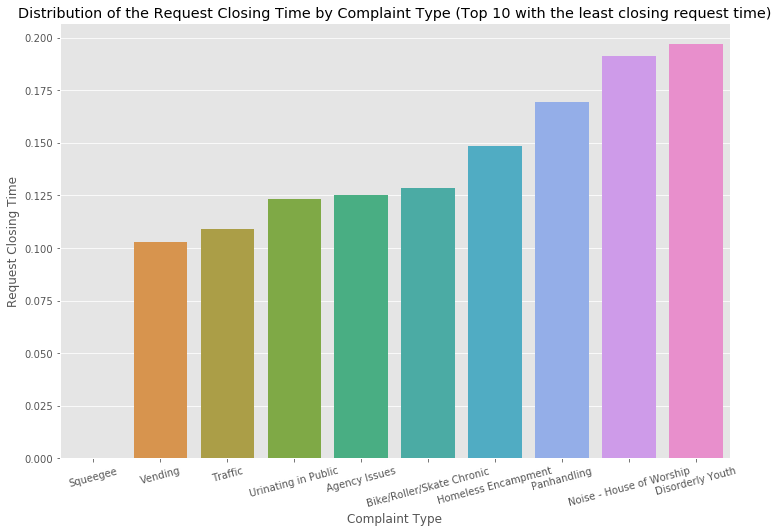

In [93]:
plt.figure(figsize=[12,8])
sns.barplot('Complaint Type', 'Request Closing Time', data=request_closing_time_by_complaint_type)
plt.xticks(rotation=15)
plt.title('Distribution of the Request Closing Time by Complaint Type (Top 10 with the least closing request time)');
plt.savefig('Request_closing_time_by_complaint_type.jpeg',papertype='a3')

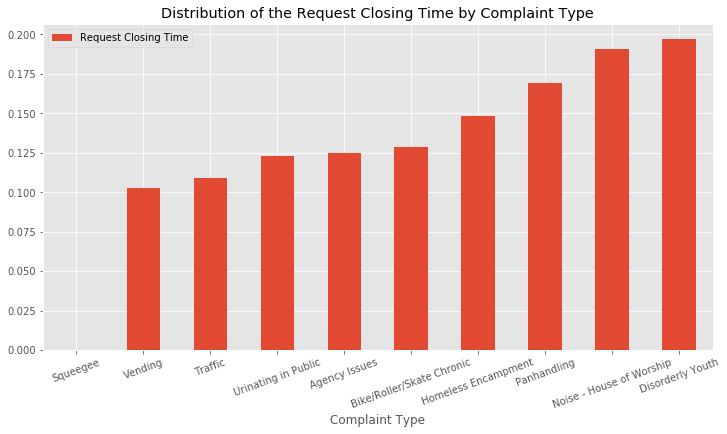

In [79]:
fig,ax=plt.subplots(figsize=[12,6])
request_closing_time_by_complaint_type.plot(kind='bar',x='Complaint Type',rot=20,ax=ax)
plt.title('Distribution of the Request Closing Time by Complaint Type');
plt.savefig('Request_closing_time_by_complaint_type.png',)

<h4> The complaint type with the fastest mean response time is Squeegee</h4>

In [275]:
#Mean Request closing time for complaint type grouped by location type
mean_request_closing_time_per_location_type = \
data.groupby(['Location Type','Complaint Type'])[['Request Closing Time']].mean().\
sort_values(by='Request Closing Time').reset_index()

In [282]:
mean_request_closing_time_per_location_type[:10].to_csv('mean_request_closing_time_per_location_type.csv')
request_closing_time_by_complaint_type.to_csv('request_closing_time_by_complaint_type.csv')

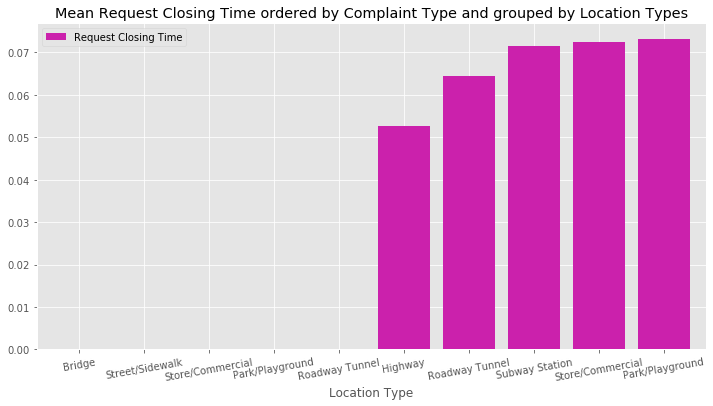

In [289]:
fig,ax= plt.subplots(figsize=[12,6])
mean_request_closing_time_per_location_type[:10].plot.bar(x='Location Type',rot=10,ax=ax,width=0.80,color='#cb21ac')
plt.title('Mean Request Closing Time ordered by Complaint Type and grouped by Location Types')
plt.savefig('top10_mean_request_closing_time_per_location_type.jpg');

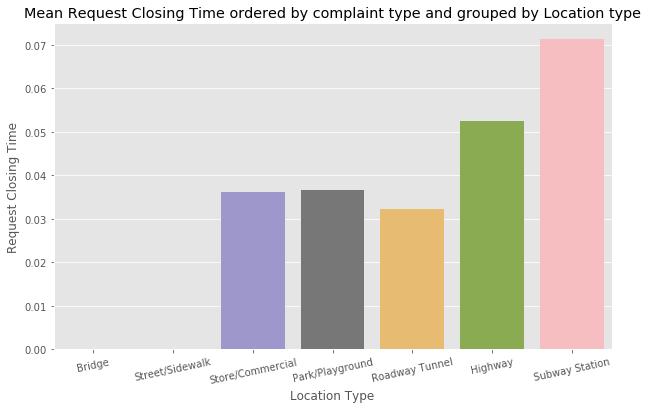

In [271]:
plt.figure(figsize=[10,6])
sns.barplot(x='Location Type', y= 'Request Closing Time',data=mean_request_closing_time_per_location_type[:10], ci=False)
plt.xticks(rotation=12)
plt.title('Mean Request Closing Time ordered by complaint type and grouped by Location type');

<p> From the table above we can see that the complaint types with the fastest response are complaints made about a Homeless Encampment around the Bridge, Roadway tunnel, Squeegee in street/sidewalk, panhandling around the park/playground and Posting Advertisement around store/commercials. </p>

In [81]:
complaints_by_city = data[['City','Complaint Type']]

<h4> Total complaint Type by city </h4>

In [82]:
top_10_complaints_by_city= data.groupby(['City']).agg({'Complaint Type':'count'}\
                                              ).sort_values(by='Complaint Type',ascending =False).reset_index()[:10]

In [283]:
top_10_complaints_by_city.to_csv('top_10_complaints_by_city.csv')

In [285]:
top_10_complaints_by_city

,City,Complaint Type
0,BROOKLYN,118849
1,NEW YORK,77289
2,BRONX,49166
3,STATEN ISLAND,15335
4,JAMAICA,8930
5,ASTORIA,7991
6,FLUSHING,7486
7,RIDGEWOOD,6391
8,CORONA,5383
9,WOODSIDE,4357


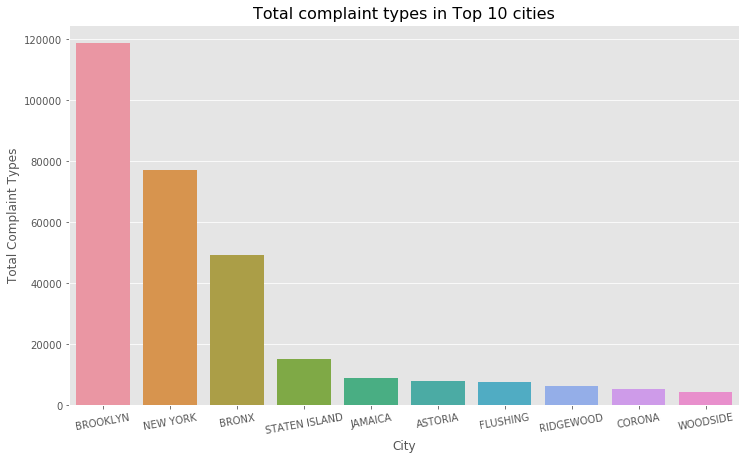

In [286]:
plt.figure(figsize=[12,7])
sns.barplot('City', 'Complaint Type', data=top_10_complaints_by_city)
plt.xticks(rotation=10)
plt.title('Total complaint types in Top 10 cities', fontsize=16)
plt.ylabel('Total Complaint Types');
plt.savefig('request_closing_request_time_by_city.jpeg',dpi=100)

<strong> From the table above we see that the city with the major complaints are made is Brooklyn, followed by New York. With Howard Beach as the least city</strong>

In [94]:
most_complaint_type = pd.value_counts(data['Complaint Type'])

In [292]:
most_complaint_type.reset_index().to_csv('most_complaint_type.csv')

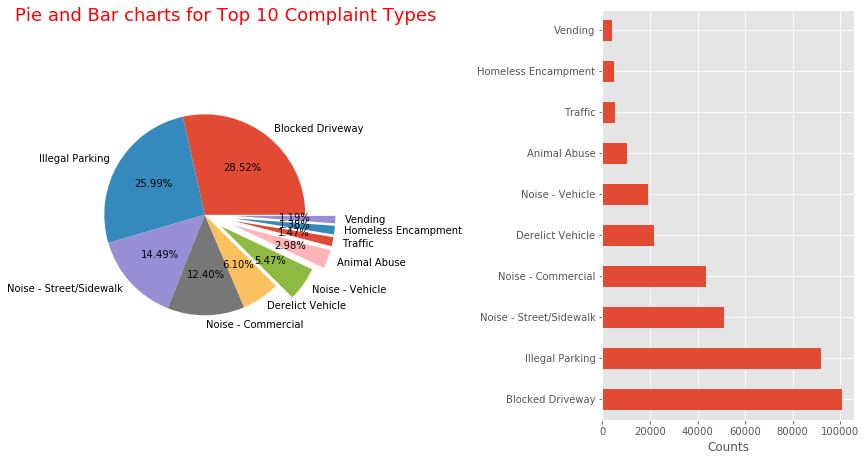

In [106]:
fig,ax = plt.subplots(1,2, figsize=[12,6.5])
fig.suptitle('Pie and Bar charts for Top 10 Complaint Types', fontsize=18, color='red', ha='right')

most_complaint_type[:10].plot(kind='pie',autopct='%.2f%%',ax=ax[0],explode=(0,0,0,0,0,0.2,0.3,0.3,0.3,0.3))
ax[0].set(ylabel='')

most_complaint_type[:10].plot.barh(x='Complaint Type',ax=ax[1])
ax[1].set_xlabel('Counts')
plt.tight_layout(1.2)
plt.savefig('Top_10_Complaint_Types.jpeg',dpi=140, papertype='a3');

<strong>Comment: From the visualisation, we see that the top complaints are complaints involving Blocked Driveways followed by Illegal packing. The least are complaints involving vending machine matters </strong>

<h4> Complaints status </h4>

In [31]:
data.Status.value_counts().to_frame()

,Status
Closed,362114
Open,36
Assigned,26
Draft,1


<p> Comment: This tells us that majority of the complaint cases opened were closed.</p>

<b> Counts of Request closing time </b>

In [54]:
data['Request Closing Time'].value_counts().to_frame().sort_index()

,Request Closing Time
0,283357
1,76864
2,1546
3,259
4,76
5,27
6,25
7,13
8,3
9,2


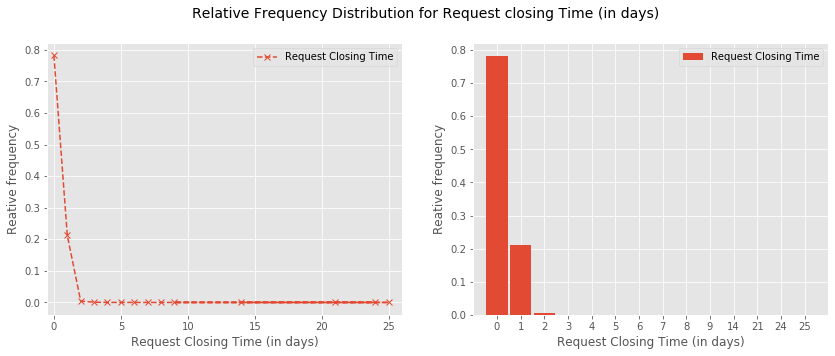

In [138]:
fig,ax= plt.subplots(1,2,figsize=[14,5])
data['Request Closing Time'].value_counts().to_frame().transform(lambda x:x/x.sum()).plot(marker='x',ax=ax[0],linestyle='--')
ax[0].set(xlim=(-0.5,26),xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency')

data['Request Closing Time'].value_counts().to_frame().sort_index().transform(lambda x:x/x.sum()).plot(kind='bar',ax=ax[1],rot=0,width=0.9)
ax[1].set(xlabel= 'Request Closing Time (in days)',ylabel= 'Reative frequency',xlim=(-1,14))
fig.suptitle('Relative Frequency Distribution for Request closing Time (in days)',fontsize=14);

<p><strong>comment:</strong> From the table we see that majority of the complaint cases filed was closed in less than a day </p>

<h3> Statistical Testing</h3>

<b>Questions:</b>
<ol>
    <li>Is the average response time across complaint types similar or not (overall)</li>
    <li>Are the type of complaint or service requested and location related </li>
</ol>

<strong>Question 1</strong>

<b>We will be using one way ANOVA to test the similarity or difference in mean response time across complaint types (ie if the difference across their means is statstically significant or not.</b>

Firstly, we will state our  hypotheses:

<u>Hypotheses statements</u>
<p><strong>Null hypothesis:</strong> The average response time across complaint types is equal or similar.</p>
<p><b>Alternative hypothesis: </b> The average response time across complaint types is not equal or is different.</p>
<p><strong>alpha</strong>= 0.05</p>

In [139]:
from scipy.stats import f_oneway

In [140]:
unique_complaint_type = data['Complaint Type'].unique().tolist()

In [141]:
print(unique_complaint_type, end='')

['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Agency Issues', 'Squeegee', 'Animal in a Park']

In order to create arrays for each of the complaint types, i will create a dictionary of complaint types, each with their request closing times as lists, and then convert each of them to arrays.


In [142]:
from collections import defaultdict

In [143]:
complaint_type_dict = defaultdict(list)

In [144]:
for complaint, closing_time in data[['Complaint Type','Request Closing Time']].values:
    if complaint in unique_complaint_type:
        complaint_type_dict[complaint].append(closing_time)

In [145]:
len(complaint_type_dict) #same with the number of unique complaint types

23

In [146]:
complaint_type_array = np.array([array for key,array in complaint_type_dict.items()]) #converting each list to array

# or use np.append([],[array for key,array in complaint_type_dict.items()]) #converting each list to array

In [147]:
noise_street_sidewlak = complaint_type_array[0]
blocked_driveway = complaint_type_array[1]
illegal_parking = complaint_type_array[2]
derelict_vehicle =complaint_type_array[3]
noise_commercial = complaint_type_array[4]
posting_advert = complaint_type_array[5]
noise_vehicle = complaint_type_array[6]
animal_abuse = complaint_type_array[7]
vending = complaint_type_array[8]
traffic = complaint_type_array[9]
drinking = complaint_type_array[10]
bike_roller_skate = complaint_type_array[11]
panhandling = complaint_type_array[12]
noise_park = complaint_type_array[13]
homeless_encamp = complaint_type_array[14]
urinate_pub = complaint_type_array[15]
graffiti = complaint_type_array[16]
disorder_youth = complaint_type_array[17]
illegal_fireworks = complaint_type_array[18]
agency_issues = complaint_type_array[19]
squeegee = complaint_type_array[20]
animal_park = complaint_type_array[21]

In [148]:
#One way ANOVA to test if the difference in means is statistically significant or not
F_statistic,p_val = \
f_oneway(noise_street_sidewlak,blocked_driveway,illegal_parking,derelict_vehicle,noise_commercial,\
         posting_advert,noise_vehicle,animal_abuse,vending,traffic,drinking,bike_roller_skate,panhandling,\
         noise_park,homeless_encamp,urinate_pub,graffiti,disorder_youth,illegal_fireworks,agency_issues,\
         squeegee,animal_park)

In [149]:
print('F-Statistic: {}, p-value:{}'.format(F_statistic,p_val))

F-Statistic: 132.46529732301363, p-value:0.0


<strong>Comment</strong>
<p>From the one way ANOVA test, the p-value is far less than the significance level so we will reject the null hypothesis and conclude that the mean request closing time across complaint types is different, overall</p>

<p><b>Question 2</b></p>

In testing the relationship between location type and complaint type,we will use the chi square test for independence. 
<p><b>Null hypothesis :</b> There is no relationship/association between location type and complaint type</p>
<p><b>Alternative Hypothesis: </b>There is a relationship/an association between location type and complaint type </p>
<p><b>Alpha:</b> 5% </p>

In [150]:
from scipy.stats import chi2_contingency

In [151]:
contingency_table = pd.crosstab(data['Location Type'], data['Complaint Type'])

In [152]:
chisq_statistic, p_value, ddof, expected = chi2_contingency(contingency_table.values)

In [153]:
print('Chi square statistic: {}, p-value: {}'.format(chisq_statistic,p_value))

Chi square statistic: 1625098.2311304228, p-value: 0.0


<strong>comment:</strong>
<p> From the chi square test results, we see that the p-value is less than the alpha or level of significance, hence we will reject our null hypothesis and conclude that there is a relationship between Location Type and Complaint Type</p>

In [163]:
with open('Statisctical testing.txt', 'r+') as file:
    f = file.read()